In [74]:
#/usr/bin/python3.8
# Use jupyter notebook with python 3+ 
"""
Auth : Al Sabawi
Date: Mar 14, 2020
"""
# Need the following libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Source

#### Johns Hupkins Whiting School of Engineering COVID-19 Data Repository at https://github.com/CSSEGISandData

## Download the data to your computer daily

In [143]:
## Download the latest data file from:
## https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
## File name "time_series_19-covid-Confirmed.csv"  for all confirmed cases in the world by region
## *** DOWNLOAD to local directory ***
filename = './time_series_19-covid-Confirmed.csv'
df_confirmed = pd.read_csv(filename)

## Separate the dates to use as an index later
dates = df_confirmed.columns[4:]

## Filter for the USA data only 
usa = df_confirmed[df_confirmed['Country/Region'].values == 'US']

## Put the US data into a DataFrame Series and give it a name
us_df = pd.DataFrame(usa[dates].sum(), columns=['Actual USA COVID-19 Cases'])

## Plot the confirmed COVID-19 Cases

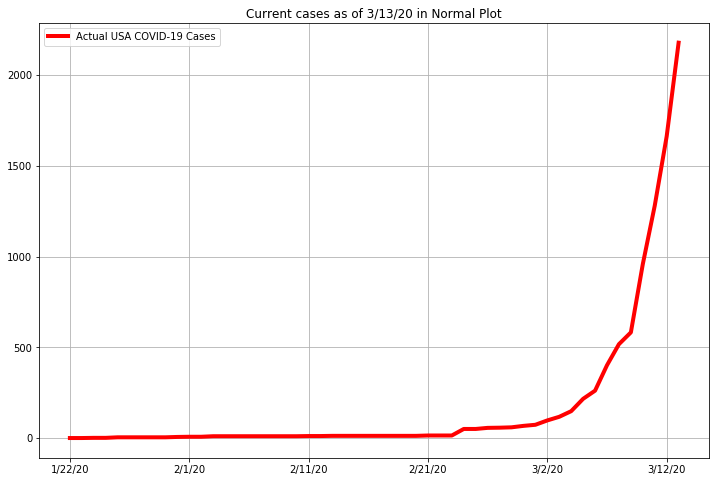

In [144]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(12,8))
us_df = pd.DataFrame(usa[dates].sum(), columns=['Actual USA COVID-19 Cases'])

us_df.plot(ax=ax,c='r', lw=4,title='Current cases as of '+str(us_df.index[-1])+' in Normal Plot')
ax.grid(True,which="both")

## Calculate R-naught 

### Form more info on R-naught, check https://en.wikipedia.org/wiki/Basic_reproduction_number

In [148]:
## ASSUMPTION:
##    1) In early stages of contagion, there is NO limiting factor for the spreading of virus
##    2) Uninficted Population is very close to total population
##    3) Assume Free movement (No lockdowns) of individuals in and out of areas affected by virus
##
## Find Last day's total cases
TotalCasesToDate = us_df['Actual USA COVID-19 Cases'][-1:][0]
print("Total cases as of " +str(us_df.index[-1:][0]) + " is "+str(TotalCasesToDate) )

## Create a new Series that calculates the difference from day to day
ChangeFromDay2Next = us_df['Actual USA COVID-19 Cases'].diff(1)

## Find the Average change from day to day
AverageChangeFromDay2Next = ChangeFromDay2Next.mean()
print("Average change from one day to next = ", np.round(AverageChangeFromDay2Next,2),' Cases')

## Create a series of R0 by calculating the ratio of one day to the day before
r0 = [] # Will record the ratio day to day, start from day 1 to last day
for day in range(1,len(ChangeFromDay2Next)):
    if(ChangeFromDay2Next[day-1:][0] == 0): # Avoid dividing by zero
        r0.append(0)
    else:
        r0.append(ChangeFromDay2Next[day:][0]/ChangeFromDay2Next[day-1:][0] )  

## Look back 20 days only. This is the most relevant data        
GoBackDays = 20
dict0 = {'Date' : us_df.index[-GoBackDays:].values, 'R-Naught' : r0[-GoBackDays:]}
R_Naught= pd.DataFrame(dict0)    
R_Naught = R_Naught.set_index('Date')

Total cases as of 3/13/20 is 2179
Average change from one day to next =  42.71  Cases


## Plot R-naught as a Time Series

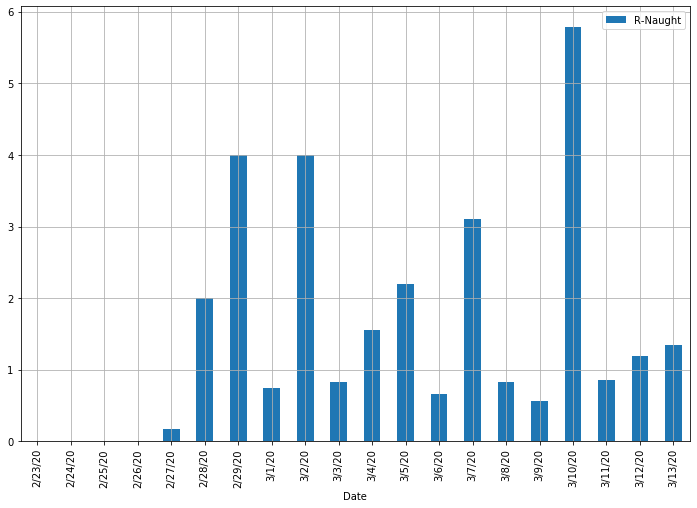

In [146]:
R_Naught.plot(kind='bar',figsize=(12,8),grid=True)

### It's plausible to assume that US officials hit the panic button at the end of 3/10/2020 when R-naught spiked to near 6. R-naught should not be allowed to exceed 1.0 for the spread to die down